In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Examples on converting to other formats

In [2]:
from distgen.drivers import run_distgen

import os

In [3]:
beam = run_distgen(inputs="data/rad.gaussian.in.yaml", verbose=1)

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
      Non-truncated sigma_xy: 2 mm
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps, avg_t = 0 ps, sigma_t:  1.1547 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -7.82345E-05 mm -> 0 mm
   Scaling sigma_x = 1.99984 mm -> 2 mm
   Shifting avg_y = -1.09911E-05 mm -> 0 mm
   Scaling sigma_y = 1.99994 mm -> 2 mm
   Shifting avg_px = -0.0212516 eV/c -> 0 eV/c
   Scaling sigma_px = 276.849 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0259627 eV/

In [4]:
# convert to simple data
beam.data()

{'n_particle': 200000,
 'species': 'electron',
 'weight': array([5.e-17, 5.e-17, 5.e-17, ..., 5.e-17, 5.e-17, 5.e-17],
       shape=(200000,)),
 'status': array([1, 1, 1, ..., 1, 1, 1], shape=(200000,)),
 'x': array([0.00128902, 0.00305076, 0.00214569, ..., 0.00260949, 0.00176679,
        0.00372237], shape=(200000,)),
 'y': array([ 5.14825056e-08,  2.02660913e-07,  2.13199098e-07, ...,
        -2.34926147e-07, -1.00008370e-07, -1.05941416e-07], shape=(200000,)),
 'z': array([0., 0., 0., ..., 0., 0., 0.], shape=(200000,)),
 'px': array([ -13.86451652,  129.51065033,  325.33389536, ...,  275.67822121,
        -388.46055152, -161.11136244], shape=(200000,)),
 'py': array([ 173.64325024,  321.97896714, -482.0850207 , ...,  250.89066818,
         486.05742409, -320.26104182], shape=(200000,)),
 'pz': array([356.09464979, 242.94221586, 160.51948126, ..., 162.23391888,
        245.05703837, 359.35728719], shape=(200000,)),
 't': array([-1.40736274e-12, -7.40252999e-14,  1.25931214e-12, ...,


# openPMD beamphysics data

In [5]:
from pmd_beamphysics import ParticleGroup

In [6]:
P = ParticleGroup(data=beam.data())

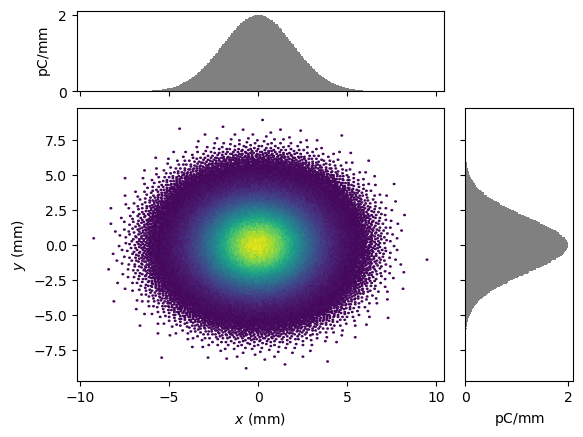

In [7]:
P.plot("x", "y")

In [8]:
# Resample to fewer particles
P2 = P.resample(10000)

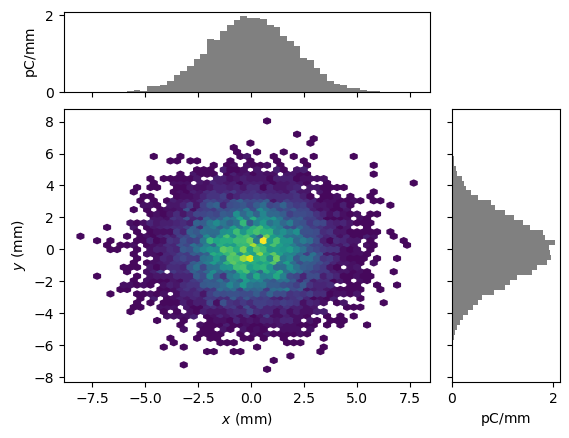

In [9]:
P2.plot("x", "y")

In [10]:
# Use the ParticleGroup to write to h5
P2.write("distgen_particles.h5")

In [11]:
P2.gamma

array([1.00000037, 1.00000034, 1.00000011, ..., 1.00000091, 1.00000003,
       1.00000034], shape=(10000,))

In [12]:
from h5py import File

with File("distgen_particles.h5", "r") as h5:
    P3 = ParticleGroup(h5)

In [13]:
P3.gamma

array([1.00000037, 1.00000034, 1.00000011, ..., 1.00000091, 1.00000003,
       1.00000034], shape=(10000,))

In [14]:
# Cleanup
os.remove("distgen_particles.h5")
os.remove("rad.gaussian.out.txt")